In [59]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape


((800, 2), (200, 2))

In [60]:
def plot_decision_boundary(model, X, y):

  # Define the axis boundaries
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

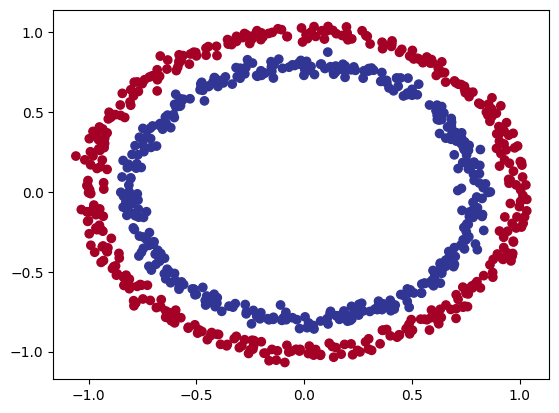

In [61]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu);

In [62]:
tf.random.set_seed(42)

#Create
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

#Fit
history = model_1.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.4737
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5175
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5250
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5850
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.5938
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.7150
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.8512
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.8537
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.9038
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3252 - accuracy: 0.9500
Epoch 11/25
25/25 [

In [63]:
#Evaluation

loss, accuracy = model_1.evaluate(X_test, y_test)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 1.0000
Model loss on the test set: 0.03350949287414551
Model accuracy on the test set: 100.00%


313/313 [==============================] - 0s 928us/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


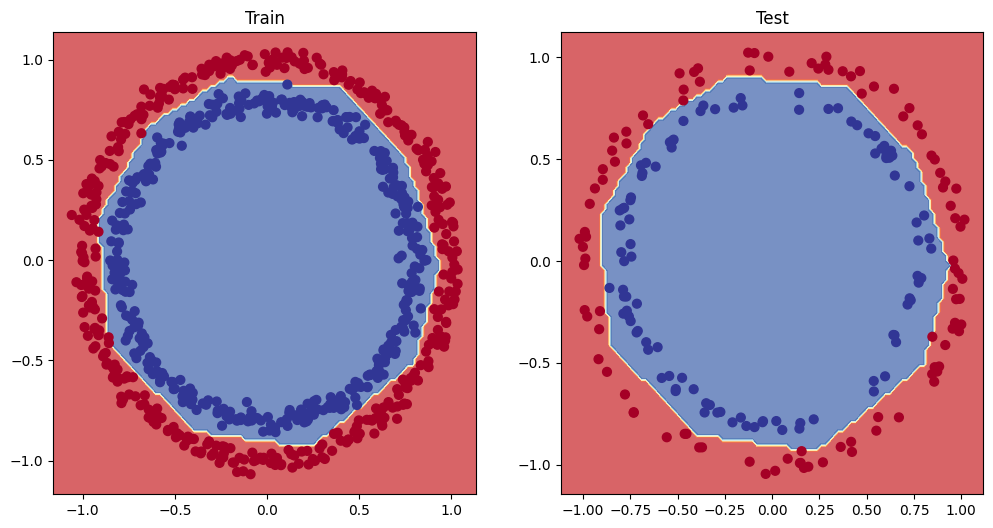

In [64]:
#Plot results

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X=X_test, y=y_test)
plt.show()